In [1]:
import typing
import math
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import Audio

In [2]:
fs = 8000

In [3]:
def synthesize(sampling_speed, wavetable, n_samples):
    """Synthesizes a new waveform from an existing wavetable."""
    samples = []
    current_sample = 0
    while len(samples) < n_samples:
        current_sample += sampling_speed
        current_sample = current_sample % wavetable.size
        samples.append(wavetable[current_sample])
        current_sample += 1
    return np.array(samples)

def karplus_strong(wavetable, n_samples):
    """Synthesizes a new waveform from an existing wavetable, modifies last sample by averaging."""
    samples = []
    current_sample = 0
    previous_value = 0
    while len(samples) < n_samples:
        wavetable[current_sample] = 0.5 * (wavetable[current_sample] + previous_value)
        samples.append(wavetable[current_sample])
        previous_value = samples[-1]
        current_sample += 1
        current_sample = current_sample % wavetable.size
    return np.array(samples)

In [4]:
t = np.linspace(0, 1, num=100)
wavetable = np.sin(np.sin(2 * np.pi * t))

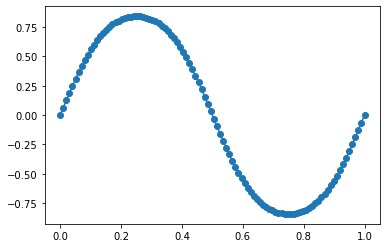

In [5]:
plt.plot(t, wavetable, '-o')

In [8]:
t = np.linspace(0, 1, num=fs)
wavetable = np.sin(np.sin(2 * np.pi * t))
sample1 = synthesize(220, wavetable, 2 * fs)

In [9]:
Audio(sample1, rate=fs)